In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib.ticker import MaxNLocator
plt.rc('axes', labelsize=15)
sns.set_theme()

import numpy as np

import time

from analytic_solution import get_analytic_solution
from NN_solver import flat_analytic_solution, unflatten_predicted_solution, NN_model
from explisit_solver import solve_heateq1D

In [145]:
def im_plot(ax, plot_data):
    """implot of grid between 0 and 1"""
    im = ax.imshow(plot_data.T, extent=[0,1, 1, 0]);
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='|True - Predicted|')

    ax.set_xlabel('Dimensionless length x', fontsize=16)
    ax.set_ylabel('Dimensionless time t', fontsize=16)
    
    return im

**Testing loss for different activation functions and optimization algorithms**

In [75]:
n:int = 100
m:int = 100
L = 1 #spacial length
T = 1 #time length

x,t,u = get_analytic_solution(n,m,L,T)

X,y = flat_analytic_solution(x,t,u)

nn_rms_relu_2Layers = NN_model('relu', 'rmsprop', 2)
nn_rms_relu_2Layers.fit_model(X,y,30,20)

nn_rms_sigmoid_2Layers = NN_model('sigmoid', 'rmsprop', 2)
nn_rms_sigmoid_2Layers.fit_model(X,y,30,20)

nn_adam_relu_2Layers = NN_model('relu', 'adam', 2)
nn_adam_relu_2Layers.fit_model(X,y, 30,20)

nn_adam_sigmoid_2Layers = NN_model('sigmoid', 'adam', 2)
nn_adam_sigmoid_2Layers.fit_model(X,y,30,20)

Epoch 1/20
334/334 [==============================] - 2s 3ms/step - loss: 0.0068
Epoch 2/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 3/20
334/334 [==============================] - 1s 2ms/step - loss: 9.9101e-04
Epoch 4/20
334/334 [==============================] - 1s 4ms/step - loss: 6.1144e-04
Epoch 5/20
334/334 [==============================] - 1s 2ms/step - loss: 4.6976e-04
Epoch 6/20
334/334 [==============================] - 1s 3ms/step - loss: 3.7495e-04
Epoch 7/20
334/334 [==============================] - 1s 2ms/step - loss: 3.1303e-04
Epoch 8/20
334/334 [==============================] - 1s 3ms/step - loss: 2.6581e-04
Epoch 9/20
334/334 [==============================] - 1s 2ms/step - loss: 2.5085e-04
Epoch 10/20
334/334 [==============================] - 1s 2ms/step - loss: 2.2409e-04
Epoch 11/20
334/334 [==============================] - 1s 2ms/step - loss: 2.0788e-04
Epoch 12/20
334/334 [==============================] - 1s 2ms/step - lo

**We check the loss of each network**

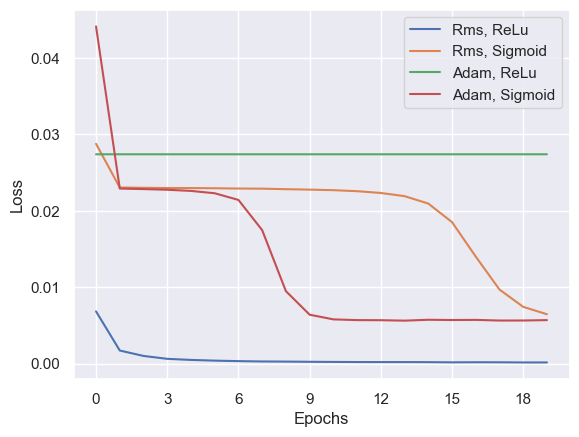

In [88]:
epochs=np.arange(0,20)

fig, ax = plt.subplots()

ax.plot(epochs,nn_rms_relu_2Layers.history.history['loss'], label='Rms, ReLu')
ax.plot(epochs,nn_rms_sigmoid_2Layers.history.history['loss'], label='Rms, Sigmoid')
ax.plot(epochs,nn_adam_relu_2Layers.history.history['loss'], label='Adam, ReLu')
ax.plot(epochs,nn_adam_sigmoid_2Layers.history.history['loss'], label='Adam, Sigmoid')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.savefig('../Figures/loss_vs_epochs.png')

In [89]:
n_test = 200
m_test = 200

x_test,t_test,u_test = get_analytic_solution(n_test,m_test,L,T)
X_test,y_test = flat_analytic_solution(x_test,t_test,u_test)

predictions_rms_relu_2Layers = nn_rms_relu_2Layers.predict_model(X_test, 30)
predictions_rms_sigmoid_2Layers = nn_rms_sigmoid_2Layers.predict_model(X_test, 30)
predictions_adam_relu_2Layers = nn_adam_relu_2Layers.predict_model(X_test, 30)
predictions_adam_sigmoid_2Layers = nn_adam_sigmoid_2Layers.predict_model(X_test, 30)

1000/1000 [==============================] - 1s 1ms/step


In [90]:
data_rms_relu_2Layers = np.abs(u_test - unflatten_predicted_solution(predictions_rms_relu_2Layers, n_test, m_test))
data_rms_sigmoid_2Layers = np.abs(u_test - unflatten_predicted_solution(predictions_rms_sigmoid_2Layers, n_test, m_test))
data_adam_relu_2Layers = np.abs(u_test - unflatten_predicted_solution(predictions_adam_relu_2Layers, n_test, m_test))
data_adam_sigmoid_2Layers = np.abs(u_test - unflatten_predicted_solution(predictions_adam_sigmoid_2Layers, n_test, m_test))

**Then we check where the loss comes from**

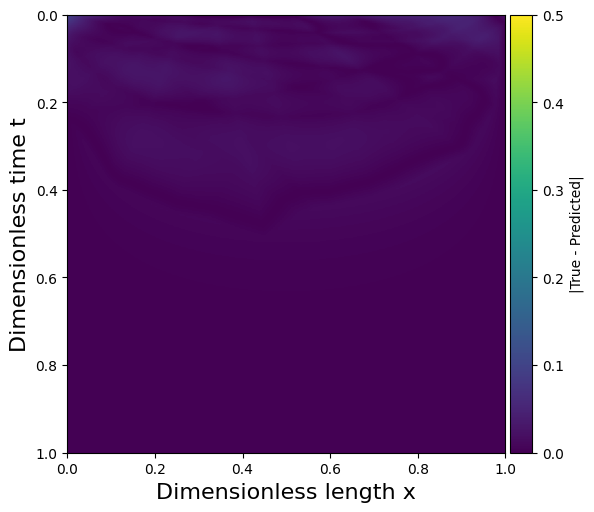

In [148]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(6,6))
im = im_plot(ax, data_rms_relu_2Layers)
im.set_clim(0,0.5)
plt.savefig('../Figures/error_rms_relu.png')

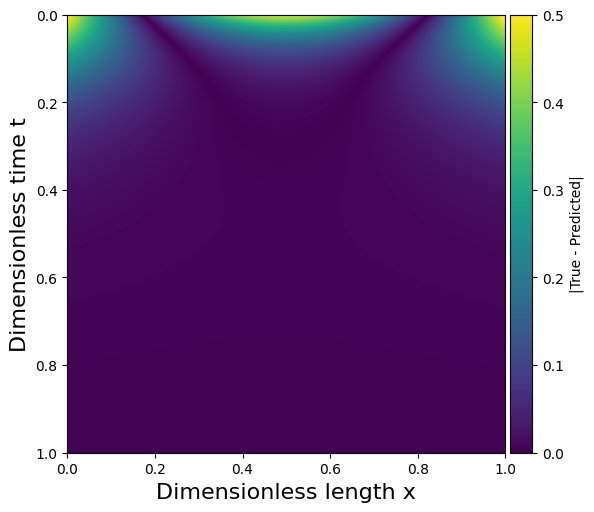

In [116]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(6,6))
im = im_plot(ax, data_rms_sigmoid_2Layers)
im.set_clim(0,0.5)
plt.savefig('../Figures/error_rms_sigmoid.png')

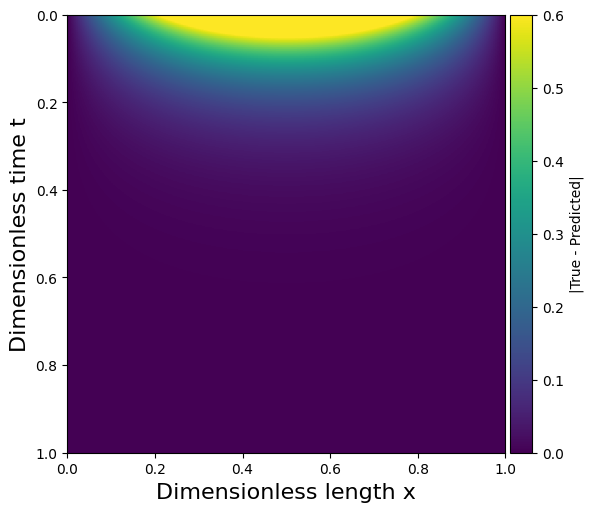

In [117]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(6,6))
im = im_plot(ax, data_adam_relu_2Layers)
im.set_clim(0,0.6)
plt.savefig('../Figures/error_adam_relu.png')

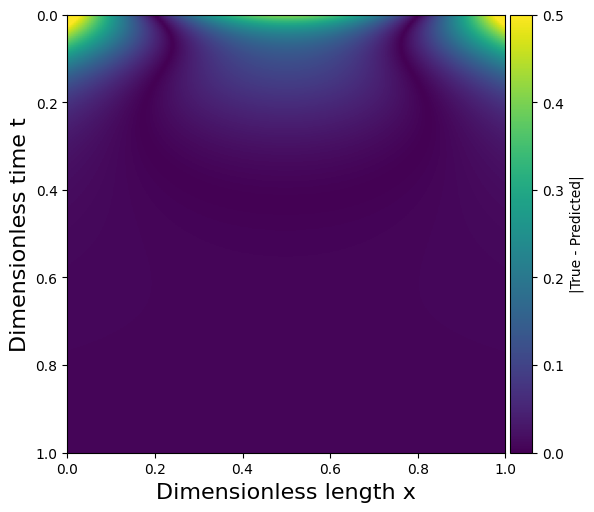

In [118]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(6,6))
im = im_plot(ax, data_adam_sigmoid_2Layers)
im.set_clim(0,0.5)
plt.savefig('../Figures/error_adam_sigmoid.png')

**We see that RMSprop with ReLu has the best loss and also best agreement with boundary conditions. Now testing this for other number of layers.**

In [99]:
nn_main_2Layers = NN_model('relu', 'rmsprop', 2)
nn_main_2Layers.fit_model(X,y,30,20)

nn_main_3Layers = NN_model('relu', 'rmsprop', 3)
nn_main_3Layers.fit_model(X,y,30,20)

nn_main_4Layers = NN_model('relu', 'rmsprop', 4)
nn_main_4Layers.fit_model(X,y,30,20)

Epoch 1/20
334/334 [==============================] - 2s 2ms/step - loss: 0.0087
Epoch 2/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 3/20
334/334 [==============================] - 1s 2ms/step - loss: 5.4574e-04
Epoch 4/20
334/334 [==============================] - 1s 2ms/step - loss: 3.3311e-04
Epoch 5/20
334/334 [==============================] - 1s 3ms/step - loss: 2.3300e-04
Epoch 6/20
334/334 [==============================] - 1s 2ms/step - loss: 1.8158e-04
Epoch 7/20
334/334 [==============================] - 1s 2ms/step - loss: 1.7149e-04
Epoch 8/20
334/334 [==============================] - 1s 2ms/step - loss: 1.6399e-04
Epoch 9/20
334/334 [==============================] - 1s 2ms/step - loss: 1.4936e-04
Epoch 10/20
334/334 [==============================] - 1s 2ms/step - loss: 1.4037e-04
Epoch 11/20
334/334 [==============================] - 1s 2ms/step - loss: 1.3465e-04
Epoch 12/20
334/334 [==============================] - 1s 2ms/step - lo

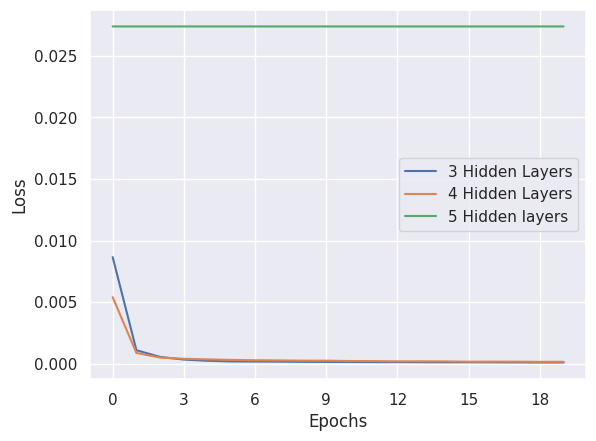

In [119]:
sns.set_theme()

fig, ax = plt.subplots()

ax.plot(epochs,nn_main_2Layers.history.history['loss'], label='3 Hidden Layers')
ax.plot(epochs,nn_main_3Layers.history.history['loss'], label='4 Hidden Layers')
ax.plot(epochs,nn_main_4Layers.history.history['loss'], label='5 Hidden layers')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

sns.reset_orig()

plt.savefig('../Figures/loss_vs_layers.png')

**Now we try increasing matrix sizes and look at the time of the explisit solution vs. the neural network**

In [123]:
f = lambda x : np.sin(np.pi*x) #u(x,0) boundary
alpha = 1/4

Δx_list = [0.5, 0.2,0.1,0.05,0.01]

In [124]:
matrix_size = []
time_explisit = []
time_nn = []

for Δx in Δx_list:
    print('next...')
    solver = solve_heateq1D(f, L, T, Δx, alpha)
    
    t0 = time.time()
    solver.solve()
    t1 = time.time()
    time_explisit.append(t1-t0)
    
    n_test = solver.n
    m_test = solver.m
    
    matrix_size.append(m_test*n_test)
    
     
    x_test,t_test,u_test = get_analytic_solution(n_test,m_test,L,T)
    X_test,y_test = flat_analytic_solution(x_test,t_test,u_test)
    
    t0 = time.time()
    nn_main_2Layers.predict_model(X_test, 30)
    t1 = time.time()
    time_nn.append(t1-t0)

next...
2/2 [==============================] - 0s 4ms/step
next...
20/20 [==============================] - 0s 2ms/step
next...
147/147 [==============================] - 0s 2ms/step
next...
1120/1120 [==============================] - 2s 2ms/step
next...
134671/134671 [==============================] - 201s 1ms/step


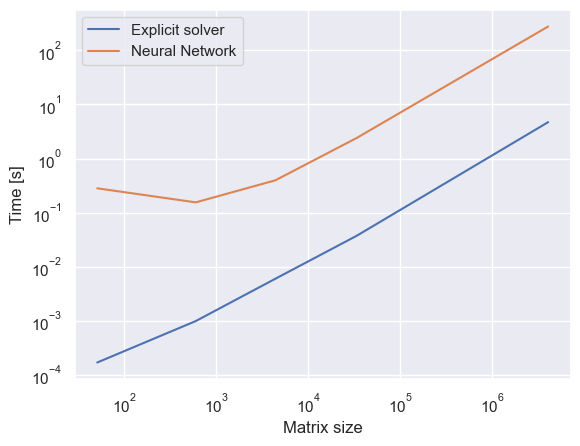

In [129]:
fig, ax = plt.subplots()
ax.plot(matrix_size, time_explisit, label='Explicit solver')
ax.plot(matrix_size, time_nn, label='Neural Network')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Matrix size')
ax.set_ylabel('Time [s]')
ax.legend()

plt.savefig('../Figures/time_vs_matrix_size.png')

**Need a plot of the explicit solution absolute error**

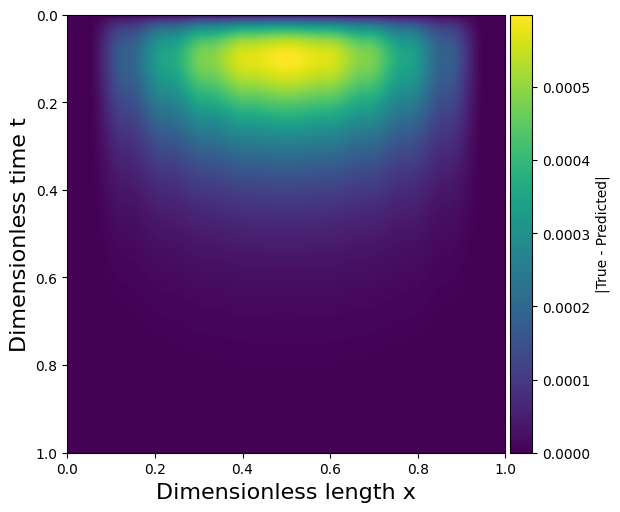

In [146]:
solver = solve_heateq1D(f, L, T, Δx=0.1)
x,t,v = solver.solve()

_,_,u = get_analytic_solution(solver.n,solver.m,L,T)

data_explicit = np.abs(u - v)

sns.reset_orig()
fig, ax = plt.subplots(figsize=(6,6))
im = im_plot(ax, data_explicit)
plt.savefig('../Figures/error_explicit.png')

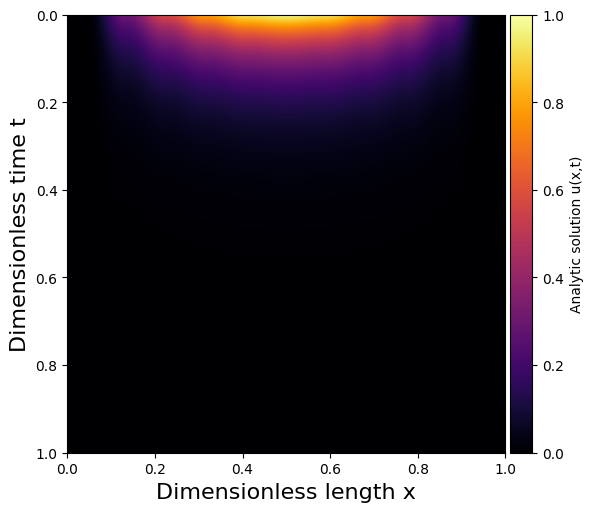

In [142]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(u.T, extent=[0,1, 1, 0], cmap='inferno');
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Analytic solution u(x,t)')
im.set_clim(0,1)

ax.set_xlabel('Dimensionless length x', fontsize=16)
ax.set_ylabel('Dimensionless time t', fontsize=16)

plt.savefig('../Figures/analytic_solution.png')